Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [51]:
NAME = "63070224"
STUDENT_ID = "Tunlaton Wongchai"

---

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# 1 Linear Regression with Regularisation

### 1.1 Import regression-datasets-housing.csv to the memory. The dataset can be downloaded at https://bit.ly/3quO6z8

In [53]:
housing = np.genfromtxt('dataset/regression-datasets-housing.csv', delimiter=',')

### 1.2 Assign values from column 1 to column 13 to X and value from column 14 to y, then convert both variables to numpy.

In [54]:
_X = housing[:, 0:13]
y = housing[:, 13].reshape(-1, 1)
_X.shape, y.shape

((506, 13), (506, 1))

### 1.3 Normalise this data to zero-mean and unit standard deviation

In [55]:
X = (_X - _X.mean(axis=0)) / _X.std(axis=0)

# print(X.mean(axis=0))
# print(X.std(axis=0))

### 1.4 Write a function to calculate a cost function (J) of Linear Regression—Mean Squared Error with regularisation—in the following format:
$$
J = computeCostFunction(X, y, \theta, \lambda)
$$
where $\theta$ is a weight vector and $lambda$ is a regularisation parameter. The function should
automatically concatenate a bias vector into $X$.

In [56]:
def add_bias(X):
    n_samples = len(X)
    return np.hstack((np.ones((n_samples, 1)), X))

def predict(X, theta):
    return np.dot(add_bias(X), theta)

def computeCostFunction(X, y, theta, λ):
    hx = predict(X, theta)
    regularisation = λ * np.sum(theta[1:] ** 2) # do not regularise bias
    return np.mean(np.square(hx - y)) + regularisation # + (regularisation / X.shape[0])

### 1.5 Write a function to find the optimal theta of Linear Regression with Regularisation by using Gradient Descent Algorithm in the following format:
$$
[θ, J_{History}] = gradientDescent(X, y, \theta, \alpha, \lambda, n_{iteration})
$$
where $\alpha$ is a learning rate, $\lambda$ is a regularisation parameter, niteration is the number of iteration, and $J_{History}$ is a vector that store $J$ for every iteration. Noted that bias value should not be regularised.

In [57]:
def gradientDescent(X, y, theta0, alpha, λ, n_iteration, verbose=False):
    j_history = []
    theta = np.copy(theta0)
    n_samples = X.shape[0]

    for i in range(n_iteration):
        prediction = predict(X, theta)
        
        gradient = alpha * (np.dot(add_bias(X).T, prediction-y) + λ * theta) / n_samples
        theta = theta - gradient

        loss = computeCostFunction(X, y, theta, λ)
        j_history.append(loss)
        if verbose:                                                               
            print(f'Iteration: {i} Loss: {loss}')

    return theta, j_history

def createTheta(X):
    return np.ones((X.shape[1] + 1, 1))

### 1.6 Train a model

The model hyperparameter $\alpha$ = 0.1, $n_{iteration}$ = 1000 and $\lambda$ = [0, 0.01, 0.1, 1, 10]. Plot the convergence curve of each $\lambda$. Then, report the effect of λ on error value. In addition, plot the bar chart of weights of each model.

In [58]:
theta_list = []
labels = []

loss: 21.990725495660946


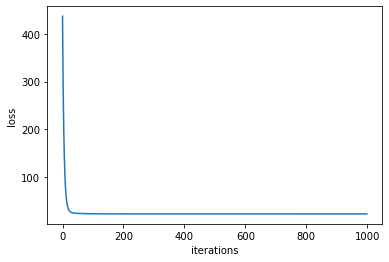

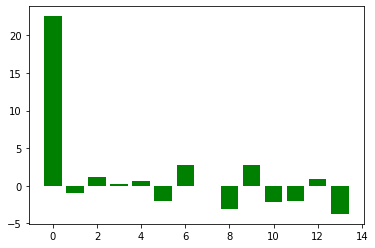

In [59]:
# λ=0
theta, j_history = gradientDescent(X, y, createTheta(X), alpha=0.1, λ=0, n_iteration=1000)
print('loss:', j_history[-1]) 
theta_list.append(theta.flatten())
labels.append('0')

plt.xlabel("iterations")
plt.ylabel("loss")
plt.plot(j_history)
plt.show();

plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

loss: 22.53573181374157


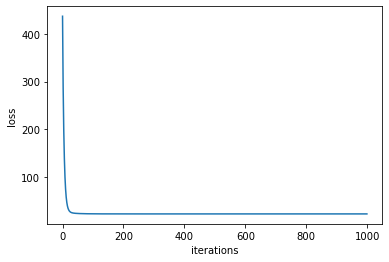

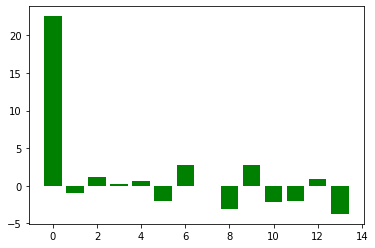

In [60]:
# λ = 0.01
theta, j_history = gradientDescent(X, y, createTheta(X), alpha=0.1, λ=0.01, n_iteration=1000)
print('loss:', j_history[-1])
theta_list.append(theta.flatten())
labels.append('0.01')

plt.xlabel("iterations")
plt.ylabel("loss")
plt.plot(j_history)
plt.show();

plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

loss: 27.43065777229755


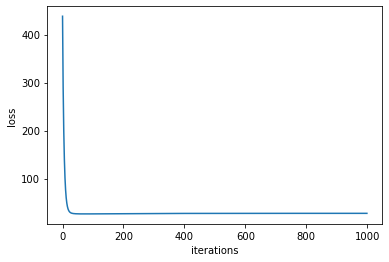

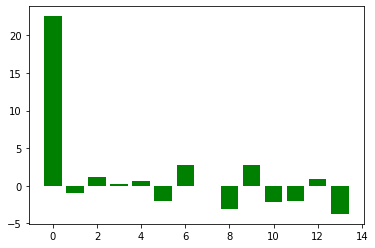

In [61]:
# λ = 0.1
theta, j_history = gradientDescent(X, y, createTheta(X), alpha=0.1, λ=0.1, n_iteration=1000)
print('loss:', j_history[-1])
theta_list.append(theta.flatten())
labels.append('0.1')

plt.xlabel("iterations")
plt.ylabel("loss")
plt.plot(j_history)
plt.show();

plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

loss: 75.4108105101548


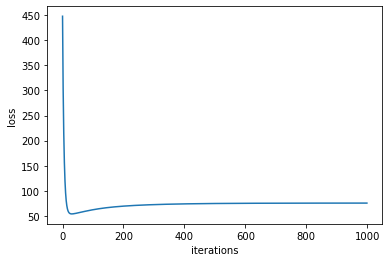

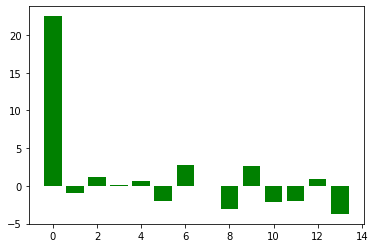

In [62]:
# λ = 1.0
theta, j_history = gradientDescent(X, y, createTheta(X), alpha=0.1, λ=1.0, n_iteration=1000)
print('loss:', j_history[-1])
theta_list.append(theta.flatten())
labels.append('1.0')

plt.xlabel("iterations")
plt.ylabel("loss")
plt.plot(j_history)
plt.show();

plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

loss: 483.025952438257


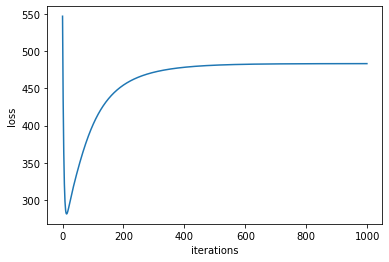

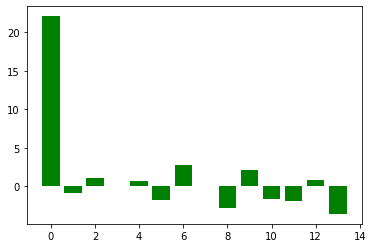

In [63]:
# λ = 10.0
theta, j_history = gradientDescent(X, y, createTheta(X), alpha=0.1, λ=10.0, n_iteration=1000)
print('loss:', j_history[-1])
theta_list.append(theta.flatten())
labels.append('10.0')

plt.xlabel("iterations")
plt.ylabel("loss")
plt.plot(j_history)
plt.show();

plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

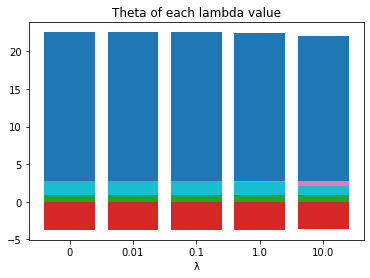

In [64]:
plt.title('Theta of each lambda value')
normailsed_theta_list = theta_list
# normailsed_theta_list = (np.abs(theta_list) - np.min(theta_list, axis=0)) / np.max(theta_list, axis=0)
for i, vals in enumerate(zip(*normailsed_theta_list)):
    indices = np.arange(len(vals))
    plt.bar(indices, vals)
    
plt.xticks(indices, labels)
plt.xlabel('λ')
plt.show();

What do you observe when you vary the value of λ?

YOUR ANSWER HERE

# 2 Least Square with Regularisation

### 2.1 Use the same dataset—X and y—obtained from Part 1. Write a function to add a bias vector to X in the following format:
$$
X = addBias(X)
$$

In [65]:
def add_bias(X):
    n_samples = len(X)
    return np.hstack((np.ones((n_samples, 1)), X))

### 2.2 Find the Least-squares solution with regularisation on λ = [0, 0.01, 0.1, 1, 10] by using the following equation:

$$
\hat{\theta} = (X^\intercal X + \lambda \tilde{I})^{-1}X^\intercal y
$$

where $\tilde{I}$ is a manipulated identity matrix. The $\tilde{I}[0,0]$ which corresponds to the bias value
is set to 0 because the bias value will not be regularised. Plot the least-squares estimation of the function for each $\lambda$.

In [66]:
def least_square(X, y, λ):
    m = X.shape[1]
    regularisation = np.identity(m) * λ
    regularisation[0, 0] = 0
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + regularisation), X.T), y)

    return theta

loss: 21.990723212738892


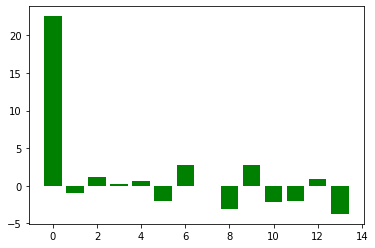

In [79]:
# λ = 0

theta = least_square(add_bias(X), y, λ=0)
loss = computeCostFunction(X, y, theta, λ=0)
print(f'loss: {loss}')

plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

loss: 22.536149192959783


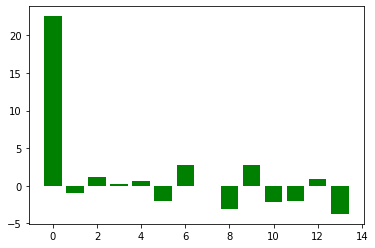

In [80]:
# λ = 0.01

theta = least_square(add_bias(X), y, λ=0.01)
loss = computeCostFunction(X, y, theta, λ=0.01)
print(f'loss: {loss}')


plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

loss: 27.434736494728963


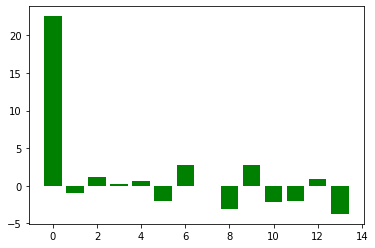

In [81]:
# λ = 0.1

theta = least_square(add_bias(X), y, λ=0.1)
loss = computeCostFunction(X, y, theta, λ=0.1)
print(f'loss: {loss}')


plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

loss: 75.44125894164951


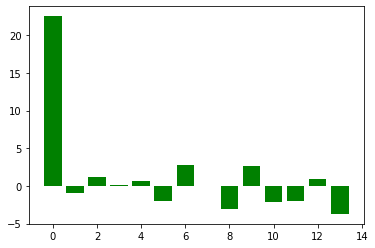

In [82]:
# λ = 1.0

theta = least_square(add_bias(X), y, λ=1)
loss = computeCostFunction(X, y, theta, λ=1)
print(f'loss: {loss}')


plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

loss: 482.8684226086625


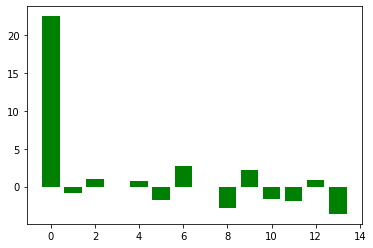

In [83]:
# λ = 10.0

theta = least_square(add_bias(X), y, λ=10)
loss = computeCostFunction(X, y, theta, λ=10)
print(f'loss: {loss}')


plt.bar(range(len(theta)), theta.flatten(), color='green')
plt.show;

Compare and discuss the the results in this Part with Part 1. Should both algorithms achieve the identical solution with the same settings?

YOUR ANSWER HERE

# 3 Logistic Regression with Regularisation

### 3.1 Load Iris dataset from sklearn library

In [84]:
iris = sklearn.datasets.load_iris()

### 3.2 Define Petal Length (cm) as X, Label—1 (Setosa) and 0 (Not Setosa)—as y

In [95]:
X = iris.data[:, 2].reshape(-1, 1)
X.shape

(150, 1)

In [96]:
y = (iris.target == 0).astype(np.int32).reshape(-1, 1)
y.shape

(150, 1)

### 3.3 Write a function to calculate a cost function—Binary Cross-entropy with regularisation— in the following format:
$$
J = computeCostFunction(X, y, \theta, \lambda)
$$
where $\theta$ is a weight vector and $\lambda$ is a regularisation parameter. The function should
automatically concatenate a bias vector into $X$.

In [102]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return sigmoid(np.dot(add_bias(X), theta))

def accuracy(y_predicted, y, threshold):
    prediction = y_predicted > threshold
    return np.mean(prediction == y)    

In [103]:
def computeCostFunction(X, y, theta, λ):
    hx = predict(X, theta)
    regularisation = (λ * np.sum(theta[1:] ** 2) / (2*X.shape[0]))
    return np.mean(np.square(hx - y)) + regularisation

### 3.4 Write a function to find the optimal weight vector of Logistic Regression with Regularisation by using Gradient Descent Algorithm in the following format:
$$
[\theta, J_{History}] = gradientDescent(X, y, \theta, \alpha, \lambda, n_{iteration})
$$
where $\alpha$ is a learning rate, $n_{iteration}$ is the number of iteration, and $J_{History}$ is a vector that store $J$ for every iteration. Noted that bias value should not be regularised.

In [121]:
def gradientDescent(X, y, theta0, alpha, λ, n_iteration, verbose=False):
    j_history = []
    theta = np.copy(theta0)
    n_samples = X.shape[0]

    for i in range(n_iteration):
        prediction = predict(X, theta)
        gradient = alpha * (np.dot(add_bias(X).T, prediction-y) + λ * theta) / n_samples
        theta = theta - gradient
        loss = computeCostFunction(X, y, theta, λ)
        j_history.append(loss)
        if verbose:
            print(f'Iteration: {i} Loss: {loss}')
        
    return theta, j_history

### 3.5 Train the model with hyperparameter α = 0.1, niteration = 1000 and λ = [0, 0.01, 0.1, 1, 10]. Plot the convergence curve and decision boundary of each λ and further report the effect of λ on decision boundary and accuracy.

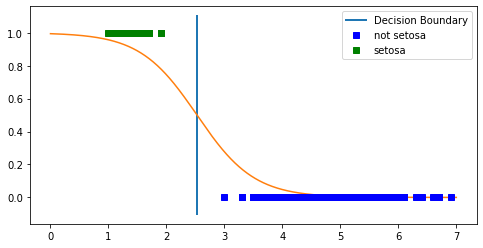

In [139]:
# λ=0

theta, j_history = gradientDescent(X, y, createTheta(X), alpha=0.1, λ=0, n_iteration=1000)

X_lin = np.linspace(0, 7, 1000).reshape(-1,1)
y_pred = predict(X_lin, theta)
decision_boundary = X_lin[y_pred>=0.5][-1]

plt.figure(figsize=(8,4))
plt.plot([decision_boundary,decision_boundary], [-0.1,1.1], linewidth=2, label='Decision Boundary')
y_lin = sigmoid(theta[0]+theta[1]*X_lin)
plt.plot(X_lin,y_lin)
plt.plot(add_bias(X)[:, 1:][y==0],y[y==0],'bs',label='not setosa')
plt.plot(add_bias(X)[:, 1:][y==1],y[y==1],'gs',label='setosa')
plt.legend();

In [130]:
X[:, 0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [ ]:
# λ = 0.01

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# λ = 0.1

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# λ = 1.0

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# λ = 10.0

# YOUR CODE HERE
raise NotImplementedError()

# 4 m-Fold Cross Validation

### 4.1 Write a function in the following format:

$$
J_m = m\_fold(X, y, \alpha, n_{iteration}, lamda\_list, m)
$$

where $J_m$ is a vector of cost calculated from each fold. (Hint: modify a function from lab manual).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### 4.2 From Part 3, Train a model with 4-fold cross validation with these hyperparameter
$\alpha$ = 0.1, $n_{iteration}$ = 1000. Observe the effect of cost values for $\lambda$ from [0, 0.01, 0.1, 1, 10] and find which λ can lead a model to the lowest cost value.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()